In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import linear_scale_forward

In [2]:
dpl = np.load('../data/dpl_sim_fitted_prior_1.npy')
theta_orig = np.load('../data/theta_sim_fitted_prior_1.npy')

prior_dict = {'gbar_evprox_1_L2Pyr_ampa': (1e-10, 1e-1), 
               'gbar_evprox_1_L5Pyr_ampa': (1e-10, 1e-1), 
               'gbar_evdist_1_L2Pyr_ampa': (1e-10, 1e-1), 
               'gbar_evdist_1_L5Pyr_ampa': (1e-10, 1e-1),
               'sigma_t_evprox_1': (1, 100),
               'sigma_t_evdist_1': (1, 100),
               't_evprox_1': (200, 300),
               't_evdist_1': (200, 300)}

theta = np.array([linear_scale_forward(theta_orig[:,idx], bounds) for idx, bounds in enumerate(prior_dict.values())]).T
sm = pd.plotting.scatter_matrix(df, figsize=(10,10))


In [3]:
columns = list(prior_dict.keys())

df = pd.DataFrame(theta, columns=columns)
df['amplitude']  = [np.min(dpl[idx, :]) for idx in range(dpl.shape[0])]

In [7]:
df.to_csv('beta_event_amplitude.csv')

Text(0.5, 1.0, 'Beta Event Amplitude Distribution')

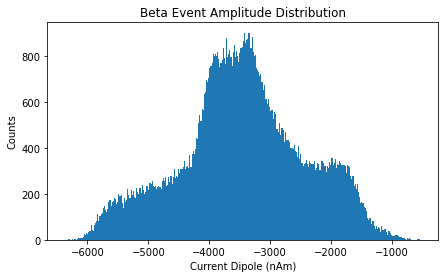

In [4]:
plt.figure(figsize=(7,4))
plt.hist(df['amplitude'], bins=int(np.sqrt(df.shape[0])))
plt.xlabel('Current Dipole (nAm)')
plt.ylabel('Counts')
plt.title('Beta Event Amplitude Distribution')

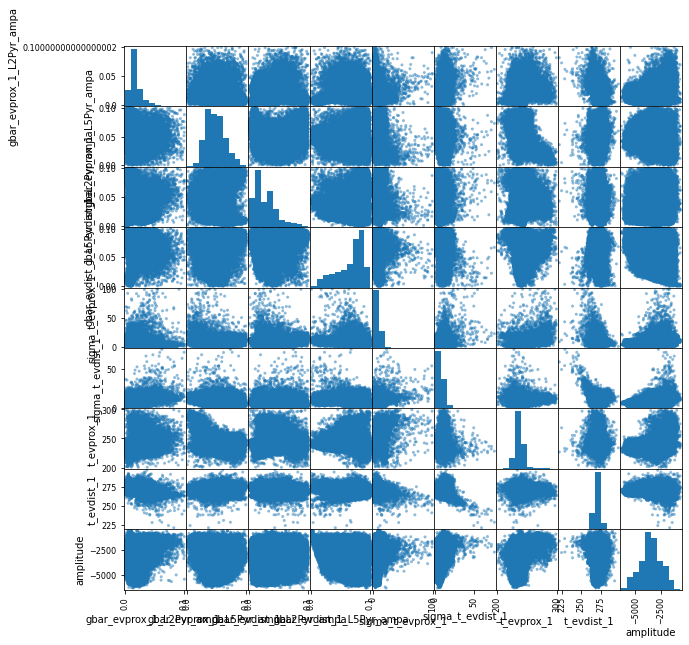

In [6]:
sm = pd.plotting.scatter_matrix(df, figsize=(10,10))